# W02 Day 03 Notes

* JSON and XML recap comparison [Link](https://www.guru99.com/json-vs-xml-difference.html)

In [8]:
import pandas as pd

In [9]:
# to read a JSON
url = "https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.json"
first_json = pd.read_json(url)
first_json.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


In [10]:
# to write a json .to_json
# output not specified, saved to the same directory of notebook
# only works with simple jsons - all arrays have to be the same length 
first_json.to_json('json_columns.json', orient="columns")
first_json.to_json('json_index.json', orient="index")

#### Nested JSONS

In [11]:
# df = pd.read_json('nested.json') - doesn't work because nested - note above, differtent length arrays or elements per key

In [12]:
# must use json package from core python
import json
#load json object
with open('nested.json') as f:
    nested_json = json.load(f)

print(nested_json)
print(type(nested_json))

{'article': [{'id': '01', 'language': 'JSON', 'edition': 'first', 'author': 'Allen'}, {'id': '02', 'language': 'Python', 'edition': 'second', 'author': 'Aditya Sharma'}], 'blog': [{'name': 'Datacamp', 'URL': 'datacamp.com'}]}
<class 'dict'>


In [13]:
# can be pretty printed with pprint(nested_json) - 888 not working look into later

In [14]:
from pandas.io.json import json_normalize
json_normalize(nested_json)

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_88228/930381186.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(nested_json)


,article,blog
0,"[{'id': '01', 'language': 'JSON', 'edition': '...","[{'name': 'Datacamp', 'URL': 'datacamp.com'}]"


In [15]:
# put focus on specific key with record_path
blog = json_normalize(nested_json,record_path='blog')
blog.head()

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_88228/579243067.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  blog = json_normalize(nested_json,record_path='blog')


,name,URL
0,Datacamp,datacamp.com


In [16]:
article = json_normalize(nested_json,record_path='article')
article.head()

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_88228/1444773866.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  article = json_normalize(nested_json,record_path='article')


,id,language,edition,author
0,01,JSON,first,Allen
1,02,Python,second,Aditya Sharma


In [17]:
type(article)

pandas.core.frame.DataFrame

In [ ]:
# json_normalize() has 3 main parameters - data: input data, record_path: for nested elements, and meta: let as elements

In [12]:
# another example
data = [{"state": "Florida", 
        "shortname": "FL",
        "info": {"governor": "Rick Scott"},
        "counties": [{"name": "Dade", "population": 12345},
                     {"name": "Broward", "population": 40000},
                     {"name": "Palm Beach", "population": 60000}]},
       {"state": "Ohio",
        "shortname": "OH",
        "info": {"governor": "John Kasich"},
        "counties": [{"name": "Summit", "population": 1234},
                     {"name": "Cuyahoga", "population": 1337}]}]

In [13]:
json_normalize(data)

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_87428/2129472613.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(data)


,state,shortname,counties,info.governor
0,Florida,FL,"[{'name': 'Dade', 'population': 12345}, {'name...",Rick Scott
1,Ohio,OH,"[{'name': 'Summit', 'population': 1234}, {'nam...",John Kasich


In [15]:
json_normalize(data=data, record_path='counties', meta=['state', 'shortname', ['info','governor']])

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_87428/1041046383.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  json_normalize(data=data, record_path='counties', meta=['state', 'shortname', ['info','governor']])


,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


# XML 

In [18]:
import xml.etree.ElementTree as ET

In [19]:
tree = ET.parse('Other_data_types_exercise/data.xml')

In [20]:
print(type(tree))

<class 'xml.etree.ElementTree.ElementTree'>


In [22]:
# getroot - gets the main root tag of the file
root=tree.getroot()
root

<Element 'data' at 0x114e0d9f0>

In [23]:
# now that root is the top element we can see its tags and attributes 
print(root.tag)
print(root.attrib)
print(len(root))

data
{}
3


In [26]:
# length of 3 means it has 3 children - we can access like elements in a list 
country1 = root[0]
rank = country1[0]
print(rank.tag)
print(rank.text)
print(country1[4].attrib)

rank
1
{'name': 'Switzerland', 'direction': 'W'}


In [41]:
# another example 
country3 = root[2]
rank_c3 = country3[0]
print(rank_c3.tag)
print(rank_c3.text)
print(country3[3].attrib)

rank
68
{'name': 'Costa Rica', 'direction': 'W'}


In [29]:
# extract information from all children use for loop
for country in root.findall('country'):
    # for getting child of country use find
    rank = country.find('rank').text
    # for getting attributes use get 
    name = country.get('name')
    print(name, rank)

Liechtenstein 1
Singapore 4
Panama 68


In [30]:
# look for grand children if you already know the tag 
for neighbor in root.iter('neighbor'):
    print(neighbor.attrib)

{'name': 'Austria', 'direction': 'E'}
{'name': 'Switzerland', 'direction': 'W'}
{'name': 'Malaysia', 'direction': 'N'}
{'name': 'Costa Rica', 'direction': 'W'}
{'name': 'Colombia', 'direction': 'E'}


* Top-level elements
    * root.findall(".")
* All 'neighbor' grand-children of 'country' children of the top-level elements
    * root.findall("./country/neighbor")
* elements with name='Singapore' that have a 'year' child
    * root.findall(".//year/..[@name='Singapore']")
* 'year' elements that are children of elements with name='Singapore'
    * root.findall(".//*[@name='Singapore']/year")
* All 'neighbor' elements that are the second child of their parent
    * root.findall(".//neighbor[2]")

In [37]:
my_dict = {'name':[],
            'rank':[],
            'year':[],
            'gdppc':[]}

In [38]:
# root is a list, works because all children are countries - may have to specify if different children name using: root.findall('country')
for country in root: 
    name_value = country.attrib['name']
    my_dict['name'].append(name_value)

    rank_value = country.find('rank').text # could also use index country[0].text etc. for others. 
    my_dict['rank'].append(rank_value)

    year_val = country.find('year').text
    my_dict['year'].append(year_val)

    gdppc_val = country.find('gdppc').text
    my_dict['gdppc'].append(gdppc_val)  


In [39]:
print(my_dict)

{'name': ['Liechtenstein', 'Singapore', 'Panama'], 'rank': ['1', '4', '68'], 'year': ['2008', '2011', '2011'], 'gdppc': ['141100', '59900', '13600']}


In [40]:
# turn to df
df = pd.DataFrame(my_dict)
df

,name,rank,year,gdppc
0,Liechtenstein,1,2008,141100
1,Singapore,4,2011,59900
2,Panama,68,2011,13600


#### Excel Files

In [44]:
df = pd.read_excel("Other_data_types_exercise/test.xlsx", sheet_name = "months", engine='openpyxl')

In [45]:
df.head()

,month,value
0,january,12
1,february,13
2,march,12
3,april,5
4,may,14


In [ ]:
# to export: df.to_excel("test2.xlsx", sheet_name="test")

#### Text files

In [63]:
text_file = open("Other_data_types_exercise/text.txt", "r")
text_file

<_io.TextIOWrapper name='Other_data_types_exercise/text.txt' mode='r' encoding='UTF-8'>

In [58]:
# calling again doesn't work - moves the file pointer to the end - reads empty
# text_file.read()
# need to store to a variable

text = text_file.read()

In [66]:
text_file.readline() # goes line by line

''

In [ ]:
# lines read can be stored in a list 

#### Pictures

In [67]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

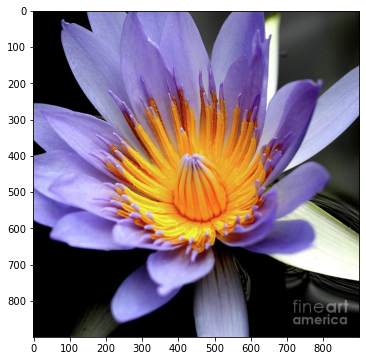

In [70]:
myImage = Image.open("Other_data_types_exercise/flower_square.jpg")
plt.figure(figsize=(9,6))
plt.imshow(myImage)

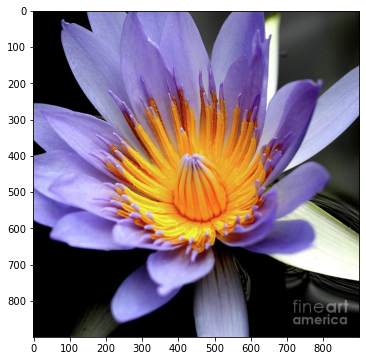

In [71]:
imgmat = np.array(myImage)
plt.figure(figsize=(9,6))
plt.imshow(imgmat)

In [72]:
print(type(myImage))
print(type(imgmat))
print(imgmat.shape) # 900x900 pixels and 3 layers for rbg, intensity of color in that position

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(900, 900, 3)


In [79]:
# editing image can be done via numpy
lx, ly, lz = imgmat.shape

X,Y = np.ogrid[0:lx, 0:ly]
print(X.shape)
print(Y.shape)

mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 10

(900, 1)
(1, 900)


In [80]:
imgmat[:,:,0][mask] = 0
imgmat[:,:,1][mask] = 0
imgmat[:,:,2][mask] = 0

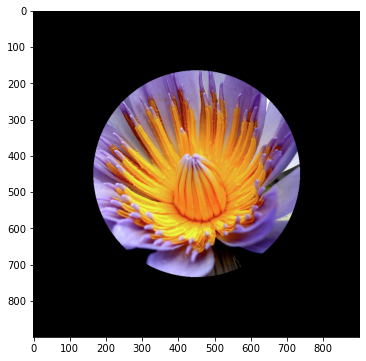

In [81]:
plt.figure(figsize=(9,6))
plt.imshow(imgmat)

#### HTML

In [ ]:
# hyper text markup language, used through the internet
# classifies and groups elements in webpage, browser turns it into visual
# markup tags = anything <> 
# <html> for language
# <head> <title> should have a close at the end, can have extra paramaters to change things - attribute name = "value" 

In [1]:
import requests
import pandas as pd

In [2]:
url = 'https://www.worldcoinindex.com/'
crypto_url = requests.get(url)
crypto_url

<Response [200]>

In [7]:
body = crypto_url.text
# body is now the full html source code 

In [9]:
crypto_data = pd.read_html(body)
print(type(crypto_data))
print(len(crypto_data))
# list with one element - a table 

<class 'list'>
1


In [10]:
# call on element
crypto_data = crypto_data[0]
crypto_data.head()

,#,Unnamed: 1,Name,Ticker,Last price,%,24 high,24 low,Price Charts 7d,24 volume,# Coins,Market cap
0,1,NaN,Bitcoin,BTC,"$ 29,163",+0.70%,"$ 30,096","$ 28,907",NaN,$ 29.21B,19.03M,$ 555.18B
1,2,NaN,Ethereum,ETH,"$ 2,101.38",+1.26%,"$ 2,185.40","$ 2,073.63",NaN,$ 27.42B,120.74M,$ 253.72B
2,3,NaN,Terra,LUNA,$ 0.874250,-18.34%,$ 1.35,$ 0.821108,NaN,$ 11.67B,468.44M,$ 409.54M
3,4,NaN,Binanceusd,BUSD,$ 1.00,-0.18%,$ 1.00,$ 0.998357,NaN,$ 6.24B,1.68B,$ 1.68B
4,5,NaN,Ripple,XRP,$ 0.409989,-1.11%,$ 0.427969,$ 0.406009,NaN,$ 3.79B,48.34B,$ 19.82B


In [ ]:
# if there is no table - will have to go through the html as text
# python package used: Beautiful Soup
# https://www.dataquest.io/blog/web-scraping-python-using-beautiful-soup/

# Lecture Notes

* tidy data:
    * each variable is a single column, each value is a single cell
    * row/column position in the data frame isn't shared with another value 
    * important for psycolearn - must have data in correct format 
    * don't have lists within a cell 

* for read_excel - specify sheet_name=1 to access specific sheets 
<br>

* JSON
    * can treat each one as separate data files using normalize
    * json_normalize()
<br>

* xml
    * main purpose is to carry data 
    * import xml.etree.ElementTree as et
    * tree = et.parse('data.xml')
    * root = tree.getroot() 
    * root.tag - returns tags 
    * root.attrib - returns attributes
    * len(root) - returns number of 'children' how many nested
    * run a for loop on the root to get the output for each tag, and attribute 
    * get either that tag or attribute, from nest, either root or further down, just need to index

* html
    * beautiful soup
    * .name, .title to extract different things from the html
